In [1]:
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('DSA_jobs_JobDate.csv', sep=',', header=0, parse_dates=[0], dayfirst=True)
df.head()

ds    y
0 2012-01-01  321
1 2012-01-02  143
2 2012-01-03  132
3 2012-01-04  411
4 2012-01-05  836

In [2]:
#mute unimportant diagnostic messages
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)

In [3]:
#Start by creating an instance of the Prophet class and then fit it to the dataset.

model = Prophet()
model.fit(df)

### Making Future Predictions

This is achieved using the Prophet.make_future_dataframe method and passing the number of days we’d like to predict in the future. We use the periods attribute to specify this.

In [4]:
future = model.make_future_dataframe(periods=365)
future.tail()

ds
2963 2020-02-24
2964 2020-02-25
2965 2020-02-26
2966 2020-02-27
2967 2020-02-28

In [5]:
future.head()

ds
0 2012-01-01
1 2012-01-02
2 2012-01-03
3 2012-01-04
4 2012-01-05

### Obtaining the Forecasts

We use the predict method to make future predictions. This will generate a dataframe with a yhat column that will contain the predictions.

In [6]:
forecast = model.predict(future)

forecast.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2012-01-01  197.933557 -294.415288   83.606904   197.933557   197.933557   
1 2012-01-02  198.031426 -204.910945  172.562834   198.031426   198.031426   
2 2012-01-03  198.129295  -76.795083  309.296751   198.129295   198.129295   
3 2012-01-04  198.227164  -66.549907  335.487831   198.227164   198.227164   
4 2012-01-05  198.325033   -2.061029  373.164004   198.325033   198.325033   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0     -296.579185           -296.579185           -296.579185 -159.005637   
1     -208.311040           -208.311040           -208.311040  -77.450493   
2      -94.135056            -94.135056            -94.135056   28.890931   
3      -59.504536            -59.504536            -59.504536   54.726222   
4      -16.019812            -16.019812            -16.019812   88.631003   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0   -159.005637   -159.005637 -137.573548   -137.573548   -137.573548   
1    -77.450493    -77.450493 -130.860548   -130.860548   -130.860548   
2     28.890931     28.890931 -123.025986   -123.025986   -123.025986   
3     54.726222     54.726222 -114.230758   -114.230758   -114.230758   
4     88.631003     88.631003 -104.650816   -104.650816   -104.650816   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  -98.645628  
1                         0.0  -10.279614  
2                         0.0  103.994239  
3                         0.0  138.722628  
4                         0.0  182.305220

There are a lot of columns in from the forecast dataframe. But I'm mainly mainly interested in ds, yhat, yhat_lower, and yhat_upper. yhat is our predicted forecast, yhat_lower is the lower bound for our predictions, and yhat_upper is the upper bound.

In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
2963 2020-02-24  257.026330   66.028170  455.249220
2964 2020-02-25  363.352072  173.902688  574.795705
2965 2020-02-26  388.461668  192.852765  586.630681
2966 2020-02-27  420.942819  232.178494  613.407200
2967 2020-02-28  410.860795  227.927821  613.386562

In [8]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2012-01-01  -98.645628 -294.415288   83.606904
1 2012-01-02  -10.279614 -204.910945  172.562834
2 2012-01-03  103.994239  -76.795083  309.296751
3 2012-01-04  138.722628  -66.549907  335.487831
4 2012-01-05  182.305220   -2.061029  373.164004

### Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using 'model.plot()' and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

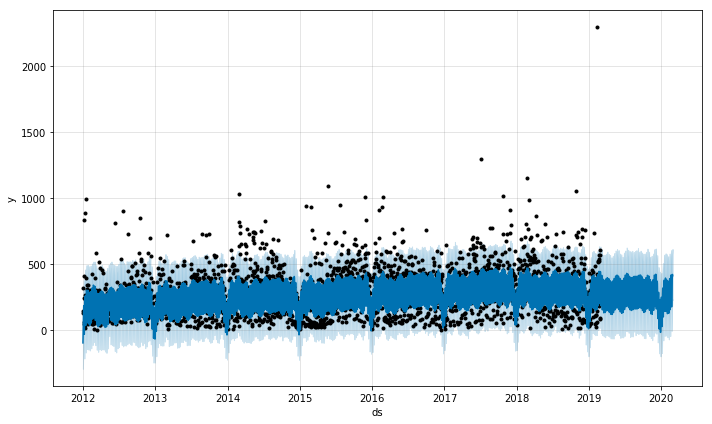

In [9]:
plot1 = model.plot(forecast)

In [10]:
#Create a plotly time series plot
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig1 = plot_plotly(model, forecast)  # This returns a plotly Figure
py.iplot(fig1)

### Plotting the Forecast Components

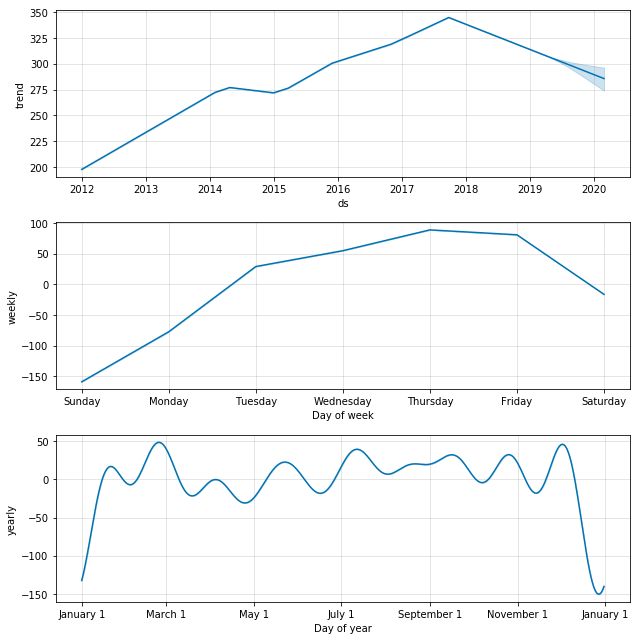

In [11]:
plot2 = model.plot_components(forecast)

### Cross Validation

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation, we select cut off points in the data history and fit the model with data up to that cut off point.

Afterwards, we compare the actual values to the predicted values. The 'cross_validation' method allows us to do this in Prophet. This method takes the following parameters, as explained below:
1. 'horizon' the forecast horizon
2. 'initial' the size of the initial training period
3. 'period' the spacing between cutoff dates.

The output of the 'cross_validation' method is a dataframe containing 'y' (the true values) and 'yhat' (the predicted values). We’ll use this dataframe to compute the prediction errors.

In [12]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='2238 days', period='180 days', horizon = '365 days')
df_cv.head()

ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2018-03-01  487.296930  307.254946  667.546990  764 2018-02-28
1 2018-03-02  483.370528  295.977363  663.694775  982 2018-02-28
2 2018-03-03  367.428592  172.780266  551.866421  353 2018-02-28
3 2018-03-04  223.915959   53.610795  404.476813  226 2018-02-28
4 2018-03-05  301.842921  128.826451  474.462167  285 2018-02-28

In [17]:
df_cv.tail()

ds        yhat  yhat_lower  yhat_upper    y     cutoff
360 2019-02-24  289.272079  108.768825  465.877067   87 2018-02-28
361 2019-02-25  371.737317  192.159934  554.927583  202 2018-02-28
362 2019-02-26  491.611768  306.282814  657.941288   85 2018-02-28
363 2019-02-27  511.989104  332.842578  687.657832  571 2018-02-28
364 2019-02-28  539.089890  375.424042  717.181801  609 2018-02-28

This cross validation procedure can be done automatically for a range of historical cutoffs using the 'cross_validation' function. We specify the forecast horizon ('horizon'), and then optionally the size of the initial training period ('initial') and the spacing between cutoff dates ('period'). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

The output of 'cross_validation' is a dataframe with the true values 'y' and the out-of-sample forecast values 'yhat', at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of 'yhat' vs. 'y'.

### Obtaining performance metrics

We use the 'performance_metrics' utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the 'yhat_lower' and 'yhat_upper' estimates.

In [13]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon           mse        rmse         mae      mape  coverage
0 36 days  30825.134620  175.570882  123.174906  1.349513  0.805556
1 37 days  32261.992461  179.616237  125.438098  1.439951  0.805556
2 38 days  25571.803145  159.911861  114.038113  1.431507  0.833333
3 39 days  25693.773779  160.292775  115.521121  1.444122  0.833333
4 40 days  25930.107712  161.028282  118.026077  1.457076  0.833333

In [18]:
df_p.tail()

horizon            mse        rmse         mae      mape  coverage
325 361 days  149134.686764  386.179604  223.978157  1.697724  0.527778
326 362 days  149664.050564  386.864383  225.949732  1.705022  0.527778
327 363 days  152433.273411  390.427040  230.127692  1.764533  0.527778
328 364 days  152170.223610  390.090020  228.605573  1.758622  0.527778
329 365 days  151707.863657  389.496937  226.471433  1.750098  0.527778

### Visualising performance metrics

The performance Metrics can be visualised using the 'plot_cross_validation_metric' utility. RMSE is visualised below.

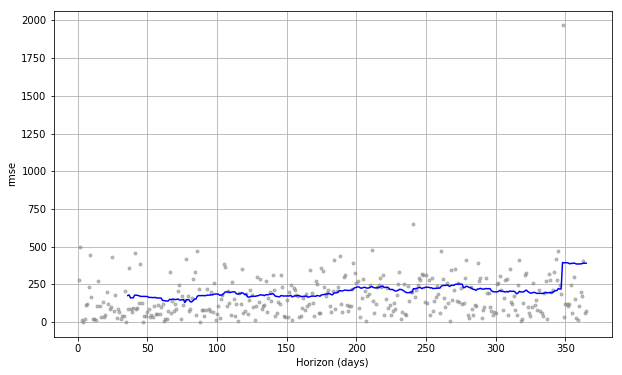

In [14]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

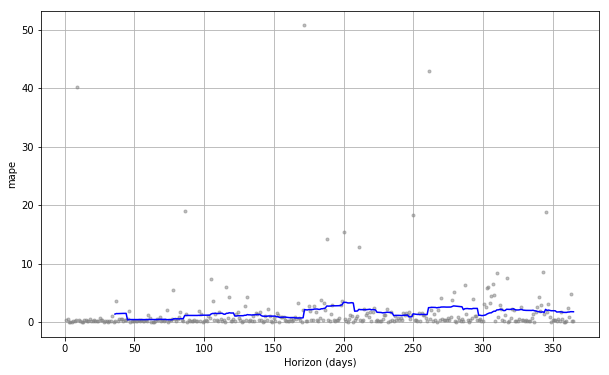

In [19]:
fig2 = plot_cross_validation_metric(df_cv, metric='mape')

In [16]:
fig3 = plot_plotly(model, df_cv)
py.iplot(fig3)

It appears that most observed values appear outside of the confidence interval (Prophet has a default 80% uncertainty level). Also, the error rates are also distorted by large outliers, like that of February 11th 2019 where the DSA job count spiked to 2,298.